<a href="https://colab.research.google.com/github/harshmalik2001/Weatherwise-Harsh-Malik/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing all the necessary Packages

In [1]:
#installing necessary packages
!pip install pyinputplus matplotlib requests


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyinputplus: filename=pyinputplus-0.2.12-py3-none-any.whl size=11348 sha256=4a95f8e5eaae4bf8432fff9739c9b727d01be0b4d70d44cf2a6c3f82aa65de8a
  Stored in directory: /root/.cache/pip/wheels/85/81/c1/325c8199c5c4de8a0b9af900ff9cd8bd69853e3d9419493512
  Created wheel for pysimplevalidate: filename=pysimplevalidate-0.2.12-py3-none-any.whl size=16225 sha256=e40ff267b39dd60a3d851837d5a72cae8745555dc3b729e1315f954c1591695f
  Stored in directory: /root/.cache/pip/wheels/09/de/18/4dd2be0dbdf31870c6f0abde43b0de197b1c095655ad7da5c2
  Created wheel for stdiomask: filename=stdiomask

Import required packages


In [2]:
import os
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip



## 🌤️ get_weather_data function is defined to fetch weather data

In [3]:
def get_weather_data(location, forecast_days=3):
    """
    Fetches weather data of  a particular city and forecast_days as arguements
    - In the get_weather_data() function we build a api url using the city name
    for example("Perth)
    - The other arguement apart from the city is the number of forecast days
    for which we have to observe the weather
    -   Sends the get request to wttr from which we receive the data in JSON format
    """
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        data['weather'] = data['weather'][:forecast_days]
        return data
    except Exception as e:
        print(f"Error fetching weather data: {e}")
        return None



## 📊 Visualisation Functions

Function to display plot of maximum temperature and minimum temperature for every date




In [4]:
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    This chunk of code visualizes the temperature data it will have the weather_data from the get_weather_data() function and the
    output_type is set as display to display the chart in the notebook itself
    """
    days = []
    max_temps = []
    min_temps = []
    for day in weather_data['weather']:
        days.append(day['date'])
        max_temps.append(float(day['maxtempC']))
        min_temps.append(float(day['mintempC']))
    fig, ax = plt.subplots()
    ax.plot(days, max_temps, label='Max Temp (°C)', marker='o')
    ax.plot(days, min_temps, label='Min Temp (°C)', marker='o')
    ax.set_title('Temperature Trend')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()
    plt.grid(True)
    if output_type == 'figure':
        return fig
    else:
        plt.show()  # Non-blocking display
        plt.pause(0.1)       # Allow window to render
        plt.close(fig)
        plt.ioff()




Function to display plot of precipitation for every date

In [5]:
# Precipitation Visualisation Function
def create_precipitation_visualisation(weather_data, output_type='display'):
    """

    This chunk of code visualizes the precipitation data it will have the weather_data from the get_weather_data() function and the
    output_type is set as display to display the chart in the notebook itself
    """
    days = []
    precip = []
    for day in weather_data['weather']:
        days.append(day['date'])
        # Sum up all hourly precipitation for the day
        total_precip = sum(float(hour['precipMM']) for hour in day['hourly'])
        precip.append(total_precip)
    fig, ax = plt.subplots()
    ax.bar(days, precip, color='skyblue')
    ax.set_title('Precipitation Trend')
    ax.set_xlabel('Date')
    ax.set_ylabel('Precipitation (mm)')
    plt.grid(True)
    if output_type == 'figure':
        return fig
    else:
        plt.show()  # Non-blocking display
        plt.pause(0.1)       # Allow window to render
        plt.close(fig)
        plt.ioff()



Function to plot a graph to contrast Maximum Temperature and Rainfall

In [6]:
def plot_temp_rain_combo(weather_data):
    days = [day['date'] for day in weather_data['weather']]
    max_temps = [int(day['maxtempC']) for day in weather_data['weather']]
    rainfall = [sum(float(hr['precipMM']) for hr in day['hourly']) for day in weather_data['weather']]

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.bar(days, rainfall, color='skyblue', alpha=0.6, label='Rainfall (mm)')
    ax1.set_ylabel('Rainfall (mm)', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(days, max_temps, color='red', marker='o', label='Max Temp (°C)')
    ax2.set_ylabel('Temperature (°C)', color='red')

    plt.title("Daily Rainfall vs. Max Temperature")
    plt.show()  # Non-blocking display
    plt.pause(0.1)       # Allow window to render
    plt.close(fig)
    plt.ioff()


## 🤖 Natural Language Processing

Function to Parses a natural language weather question to identify the location, weather attribute, and time period mentioned by the user.

In [7]:
def parse_weather_question(question):
    """
    Parse a natural language weather question into its components.

    """
    question = question.lower()
    attributes = ['temperature', 'rain', 'precipitation', 'humidity', 'wind']
    time_periods = ['today', 'tomorrow', 'day after tomorrow']
    location = None
    attribute = None
    time_period = 'today'
    for att in attributes:
        if att in question:
            attribute = att
            break
    for tp in time_periods:
        if tp in question:
            time_period = tp
            break
    words = question.split()
    if 'in' in words:
        idx = words.index('in')
        if idx + 1 < len(words):
            location = words[idx + 1]
    else:
        location = 'Perth'
    return {'location': location, 'attribute': attribute, 'time_period': time_period}



## 🧩 Main Application Logic

In [8]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    location = parsed_question['location']
    attribute = parsed_question['attribute']
    time_period = parsed_question['time_period']
    day_idx = 0
    if time_period == 'tomorrow':
        day_idx = 1
    elif time_period == 'day after tomorrow':
        day_idx = 2
    try:
        day_data = weather_data['weather'][day_idx]
        if attribute in ['temperature', None]:
            max_temp = day_data['maxtempC']
            min_temp = day_data['mintempC']
            return f"In {location.title()} on {day_data['date']}, the temperature will range from {min_temp}°C to {max_temp}°C."
        elif attribute in ['rain', 'precipitation']:
            precip = sum(float(hour['precipMM']) for hour in day_data['hourly'])
            return f"In {location.title()} on {day_data['date']}, the total precipitation is {precip:.1f} mm."
        elif attribute == 'humidity':
            humidity = day_data['hourly'][0]['humidity']
            return f"In {location.title()} on {day_data['date']}, the humidity will be {humidity}%."
        elif attribute == 'wind':
            wind = day_data['hourly'][0]['windspeedKmph']
            return f"In {location.title()} on {day_data['date']}, the wind speed will be {wind} km/h."
        else:
            return f"Sorry, I couldn't understand the weather attribute you asked for."
    except Exception as e:
        return f"Sorry, I couldn't retrieve the weather information: {e}"


## 🧭 Main Menu


In [9]:

def main_menu():
    print("Welcome to Weather Advisor!")
    while True:
        print("\nPlease choose an option:")
        print("1 - View Weather Information")
        print("2 - Ask a Weather Question")
        print("3 - Display Temperature Graph")
        print("4 - Display Rain/Precipitation Graph")
        print("5 - Display Combination of Rain and Precipitation Graph ")
        print("6 - Quit")

        choice = pyip.inputChoice(['1','2','3','4','5','6'], prompt="Enter choice (1-6): ")

        if choice == '6':
            print("Goodbye!")
            break

        location = pyip.inputStr(prompt="Enter location (city name): ")
        weather_data = get_weather_data(location, forecast_days=3)
        if not weather_data:
            print("Could not retrieve weather data. Please try again.")
            continue

        if choice == '1':
            response = generate_weather_response({'location': location, 'attribute': None, 'time_period': 'today'}, weather_data)
            print(response)
        elif choice == '2':
            question = pyip.inputStr(prompt="Ask your weather question: ")
            parsed = parse_weather_question(question)
            parsed['location'] = location
            response = generate_weather_response(parsed, weather_data)
            print(response)
        elif choice == '3':
            create_temperature_visualisation(weather_data)
        elif choice == '4':
            create_precipitation_visualisation(weather_data)
        elif choice == '5':
            plot_temp_rain_combo(weather_data)



Welcome to Weather Advisor!

Please choose an option:
1 - View Weather Information
2 - Ask a Weather Question
3 - Display Temperature Graph
4 - Display Rain/Precipitation Graph
5 - Display Combination of Rain and Precipitation Graph 
6 - Quit
Enter choice (1-6): 1
Enter location (city name): perth
In Perth on 2025-10-19, the temperature will range from 13°C to 19°C.

Please choose an option:
1 - View Weather Information
2 - Ask a Weather Question
3 - Display Temperature Graph
4 - Display Rain/Precipitation Graph
5 - Display Combination of Rain and Precipitation Graph 
6 - Quit
Enter choice (1-6): 2
Enter location (city name): Melbourne
Ask your weather question: weather in melbourne tomorrow
In Melbourne on 2025-10-20, the temperature will range from 12°C to 19°C.

Please choose an option:
1 - View Weather Information
2 - Ask a Weather Question
3 - Display Temperature Graph
4 - Display Rain/Precipitation Graph
5 - Display Combination of Rain and Precipitation Graph 
6 - Quit
Enter choi

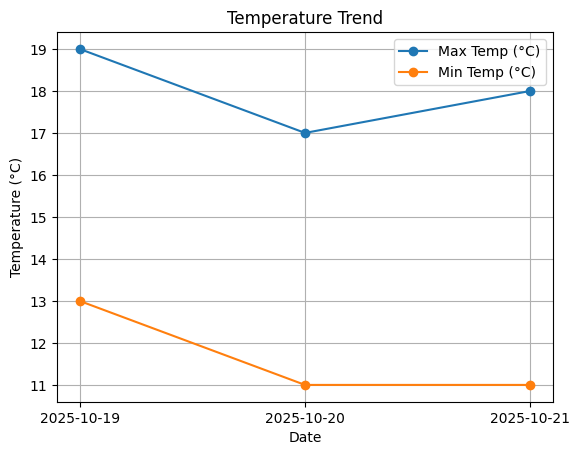


Please choose an option:
1 - View Weather Information
2 - Ask a Weather Question
3 - Display Temperature Graph
4 - Display Rain/Precipitation Graph
5 - Display Combination of Rain and Precipitation Graph 
6 - Quit
Enter choice (1-6): 4
Enter location (city name): melbourne


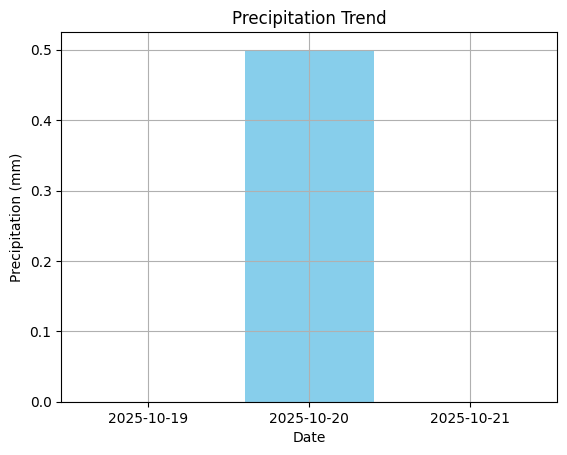


Please choose an option:
1 - View Weather Information
2 - Ask a Weather Question
3 - Display Temperature Graph
4 - Display Rain/Precipitation Graph
5 - Display Combination of Rain and Precipitation Graph 
6 - Quit
Enter choice (1-6): 5
Enter location (city name): sydney


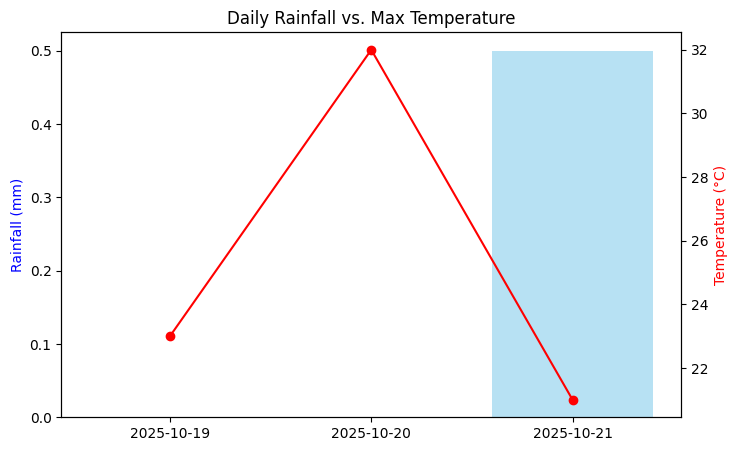


Please choose an option:
1 - View Weather Information
2 - Ask a Weather Question
3 - Display Temperature Graph
4 - Display Rain/Precipitation Graph
5 - Display Combination of Rain and Precipitation Graph 
6 - Quit
Enter choice (1-6): 6
Goodbye!


In [10]:
# Include sample input/output for each function
main_menu()

Sample Questions To ask

In [11]:

# “What’s the temperature in Perth today?”

# “How hot will it be in Sydney tomorrow?”

# “Tell me the temperature in Melbourne the day after tomorrow.”

# “What is the maximum temperature in Perth today?”

# “Will it rain in Perth today?”

# “How much rain in Brisbane tomorrow?”

# “What is the precipitation in Adelaide the day after tomorrow?”

# “Is there any rain forecast in Perth today?”

# “What is the wind speed in Perth today?”

# “Tell me the wind in Hobart tomorrow.”

# “What’s the weather in Perth today?”

# “Weather forecast for Perth tomorrow.”

# “Weather in Perth the day after tomorrow.”

# 🧪 Testing and Examples
## Testing the outputs for various  functions as well as testing for multiple cities





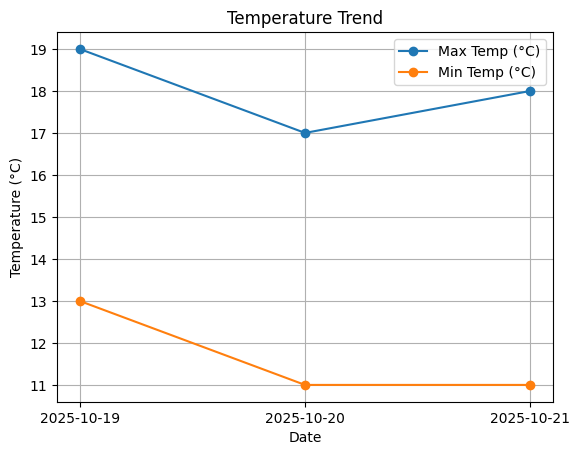

In [12]:
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    This chunk of code visualizes the temperature data it will have the weather_data from the get_weather_data() function and the
    output_type is set as display to display the chart in the notebook itself
    """
    days = []
    max_temps = []
    min_temps = []
    for day in weather_data['weather']:
        days.append(day['date'])
        max_temps.append(float(day['maxtempC']))
        min_temps.append(float(day['mintempC']))
    fig, ax = plt.subplots()
    ax.plot(days, max_temps, label='Max Temp (°C)', marker='o')
    ax.plot(days, min_temps, label='Min Temp (°C)', marker='o')
    ax.set_title('Temperature Trend')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature (°C)')
    ax.legend()
    plt.grid(True)
    if output_type == 'figure':
        return fig
    else:
        plt.show()  # Non-blocking display
        plt.pause(0.1)       # Allow window to render
        plt.close(fig)
        plt.ioff()

data = get_weather_data("Perth", 3)
create_temperature_visualisation(data)

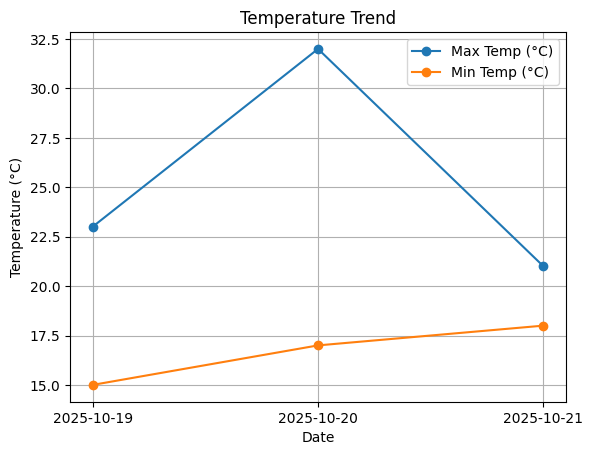

Sydney Data Above


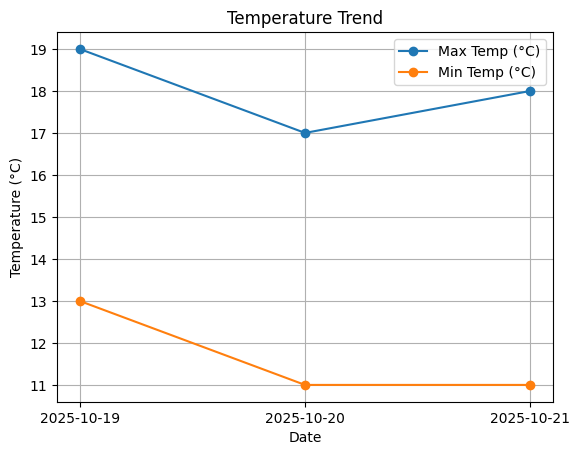

Perth Data Above


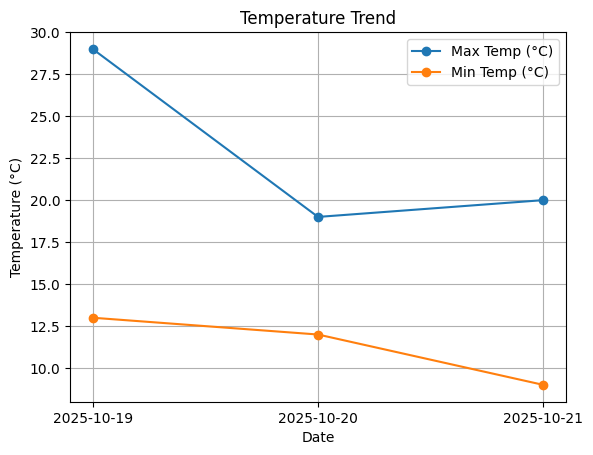

Melbourne Data Above


In [20]:
# Testing for multiple cities
sydney_data = get_weather_data("Sydney", 3)
create_temperature_visualisation(sydney_data)
print("Sydney Data Above")
perth_data = get_weather_data("Perth", 3)
create_temperature_visualisation(perth_data)
print("Perth Data Above")

melbourne_data = get_weather_data("Melbourne", 3)
create_temperature_visualisation(melbourne_data)

print("Melbourne Data Above")


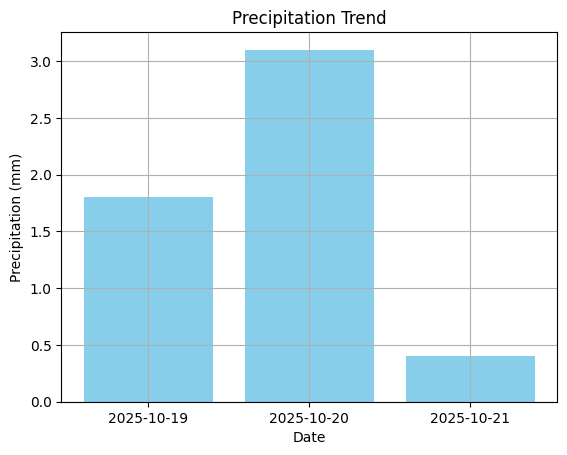

In [13]:
# Precipitation Visualisation Function
def create_precipitation_visualisation(weather_data, output_type='display'):
    """

    This chunk of code visualizes the precipitation data it will have the weather_data from the get_weather_data() function and the
    output_type is set as display to display the chart in the notebook itself
    """
    days = []
    precip = []
    for day in weather_data['weather']:
        days.append(day['date'])
        # Sum up all hourly precipitation for the day
        total_precip = sum(float(hour['precipMM']) for hour in day['hourly'])
        precip.append(total_precip)
    fig, ax = plt.subplots()
    ax.bar(days, precip, color='skyblue')
    ax.set_title('Precipitation Trend')
    ax.set_xlabel('Date')
    ax.set_ylabel('Precipitation (mm)')
    plt.grid(True)
    if output_type == 'figure':
        return fig
    else:
        plt.show()  # Non-blocking display
        plt.pause(0.1)       # Allow window to render
        plt.close(fig)
        plt.ioff()

data = get_weather_data("Perth",3)
create_precipitation_visualisation(data)

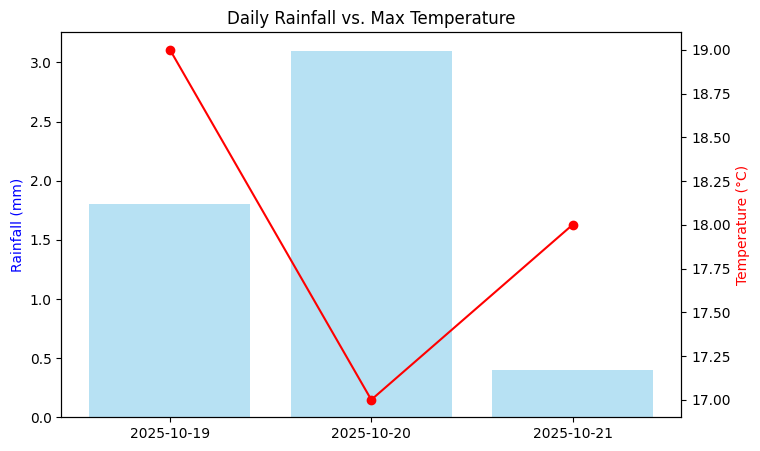

In [14]:
def plot_temp_rain_combo(weather_data):
    days = [day['date'] for day in weather_data['weather']]
    max_temps = [int(day['maxtempC']) for day in weather_data['weather']]
    rainfall = [sum(float(hr['precipMM']) for hr in day['hourly']) for day in weather_data['weather']]

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.bar(days, rainfall, color='skyblue', alpha=0.6, label='Rainfall (mm)')
    ax1.set_ylabel('Rainfall (mm)', color='blue')

    ax2 = ax1.twinx()
    ax2.plot(days, max_temps, color='red', marker='o', label='Max Temp (°C)')
    ax2.set_ylabel('Temperature (°C)', color='red')

    plt.title("Daily Rainfall vs. Max Temperature")
    plt.show()  # Non-blocking display
    plt.pause(0.1)       # Allow window to render
    plt.close(fig)
    plt.ioff()
data = plot_temp_rain_combo(get_weather_data("Perth",3))

In [15]:
## Testing the Parser
parse_weather_question('What is the Temperature of Perth Tomorrow')

{'location': 'Perth', 'attribute': 'temperature', 'time_period': 'tomorrow'}

In [16]:
weather_data = get_weather_data("Perth",5)
print(weather_data.keys())
# knowing the keys of the data returned from wttr request in JSON format so that we can know the type of labels or keys the JSON data have

dict_keys(['current_condition', 'nearest_area', 'request', 'weather'])


## 🗂️ AI Prompting Log
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.

Link to the AI Conversations - https://github.com/harshmalik2001/Weatherwise-Harsh-Malik/tree/main/ai-conversations